<h1 align="center">Отчет по соц. исследованию</h1>

<h3 align="center">Актуальность онлайн-образования</h3>

<p><b>Предмет исследования:</b></p>

<ul>
    <li>Распространенность онлайн-обучения</li>
    <li>Лучшие платформы для получения онлайн-образования</li>
    <li>Перспективы онлайн-обучения</li>
    <li>Картина идеального онлайн-курса</li>
</ul>

Для проведения исследования опрашиваемым необходимо было заполнить анкету по ссылке: https://forms.gle/dcq5nGjFKiRP93hJ7

Отображение результатов исследования:

In [85]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statistics import median

In [86]:
def get_good_reviews(data):
    # функция, возвращающая количество положительных отзывов о платформе
    return [len(list(filter(lambda x: x in ["Планирую заниматься", "Занимался, в основном положительный опыт",
                                            "Занимался, все понравилось"], review))) for review in data]


def get_prediction(x, y):
    # функция для построения линейной регрессии
    X = pd.Series(x).values.reshape(-1, 1)
    Y = pd.Series(y).values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    return X, Y, Y_pred

In [87]:
def draw_pie_chart(data, title):
    # функция для построения круговой диаграммы
    options = {option: 0 for option in set(data)}
    for item in data:
        options[item] = options.get(item, 0) + 1

    keys = list(options.keys())
    values = list(options.values())

    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

    def func(pct, allvals):
        absolute = int(pct / 100. * np.sum(allvals))
        return "{:.1f}%".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, keys, title="Варианты ответа", loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1), prop={"size": 10})

    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title(title)
    plt.savefig("output/{}".format(title), bbox_inches="tight")
    plt.show()

In [88]:
def draw_bar_chart(data, title):
    # функция для построения столбцовой диаграммы
    options = {option: 0 for option in set(data)}
    for item in data:
        options[item] = options.get(item, 0) + 1

    keys = list(options.keys())
    values = list(options.values())

    plt.figure(figsize=(15, 10))
    plt.bar(keys, values, width=0.3)
    plt.title("Лучшие предметы для изучения онлайн")

    plt.savefig("output/{}".format(title), bbox_inches="tight")
    plt.show()

In [89]:
def draw_horizontal_bars(data):
    # функция для построения горизонтальной столбцовой диаграммы
    platforms = [x[0] for x in data]
    good_reviews = [x[1] for x in data]

    plt.figure(figsize=(15, 10))
    y_pos = np.arange(len(platforms))
    plt.barh(y_pos, good_reviews, align="center")
    plt.yticks(y_pos, platforms)
    plt.xlabel("Количество положительных отзывов")
    plt.title("Популярность разных платформ")

    plt.savefig("output/Популярность платформ", bbox_inches="tight")
    plt.show()

In [90]:
def draw_popularity_charts(platforms, data):
    # функция для построения графиков медианной оценки платформ и доли положительных отзывов
    
    # для каждой платформы возьмем медианный отзыв, кроме "не слышал"
    opinions_to_numbers = {"Абсолютно неинтересно": -3, "Интересно, но отталкивает стоимость": -2,
                         "Занимался, но не понравилось": -1, "Планирую заниматься": 1,
                         "Занимался, в основном положительный опыт": 2, "Занимался, все понравилось": 3}

    reviews = [sorted([opinions_to_numbers[x] for x in review if x != "Не слышал"]) for review in data]
    median_reviews = list(map(median, reviews))
    # сортируем платформы по полученному медианному значению
    sorted_data = sorted(zip(platforms, median_reviews), key=lambda x: x[1])

    keys = [x[0] for x in sorted_data]
    values = [x[1] for x in sorted_data]

    plt.figure(figsize=(15, 10))
    plt.ylim(-4, 3)
    plt.scatter(keys, values)
    plt.yticks(range(-3, 4), opinions_to_numbers.keys())
    plt.xlabel("Название платформы")
    plt.title("Медианная оценка платформы")

    # сделаем линейную регрессию
    platforms_indices = range(len(platforms))
    X, Y, pred = get_prediction(platforms_indices, values)

    plt.scatter(X, Y)
    plt.plot(X, pred)

    plt.savefig("output/Медианная оценка платформы", bbox_inches="tight")
    plt.show()

    # теперь посчитаем долю хороших отзывов от всех отзывов
    good_reviews_share = [x / len(data[0]) for x in get_good_reviews(data)]
    sorted_data = sorted(zip(platforms, good_reviews_share), key=lambda x: x[1])

    keys = [x[0] for x in sorted_data]
    values = [x[1] for x in sorted_data]

    plt.figure(figsize=(15, 10))
    plt.ylim(0, 0.6)
    plt.scatter(keys, values)
    plt.xlabel("Название платформы")
    plt.title("Доля положительных отзывов платформы")

    # сделаем линейную регрессию
    platforms_indices = range(len(platforms))
    X, Y, pred = get_prediction(platforms_indices, values)

    plt.scatter(X, Y)
    plt.plot(X, pred)
    plt.savefig("output/Доля положительных отзывов", bbox_inches="tight")
    plt.show()

In [91]:
def parse_data(data):
    # обработка полученных данных
    
    questions = data.columns[1:]
    answers = []

    for question in questions:
        cur_answers = data[question]
        answers.append(list(cur_answers))

    answers[-6] = [x[:x.find(" (")] for x in ";".join(answers[-6]).split(";")]  # нормализуем ответ с multiple choice

    return answers

In [92]:
filename = "online_courses.csv"
data = pd.read_csv(filename)
answers = parse_data(data)

titles = ["Пол", "Образование", "Тип населенного пункта", "Опыт онлайн-обучения", "Coursera", "Stepik",
          "Edx", "GeekBrains", "Udacity", "Udemy", "Открытое образование", "Фоксфорд", "Важнейший критерий",
          "Лучшие предметы", "Форма материалов", "Отношение к дедлайнам", "Из-за чего люди бросают курсы",
          "Смотрят ли работодатели на сертификаты", "Сможет ли заменить очное образование"]

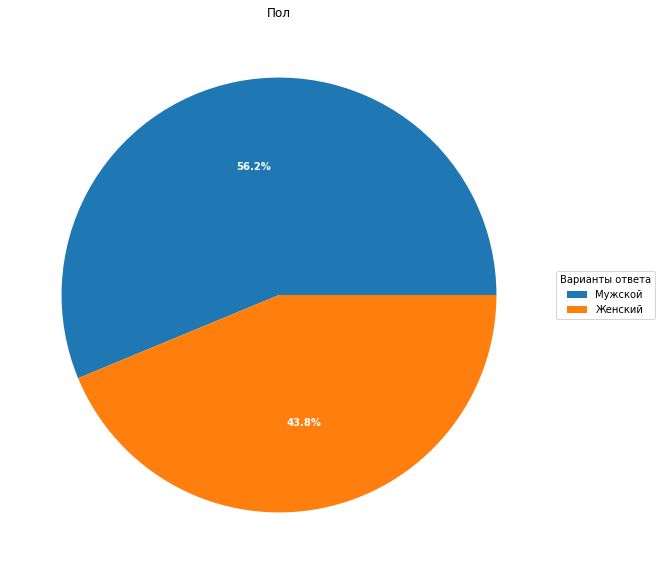

In [93]:
draw_pie_chart(answers[0], titles[0])

По полу опрашиваемые разделились практически поровну.

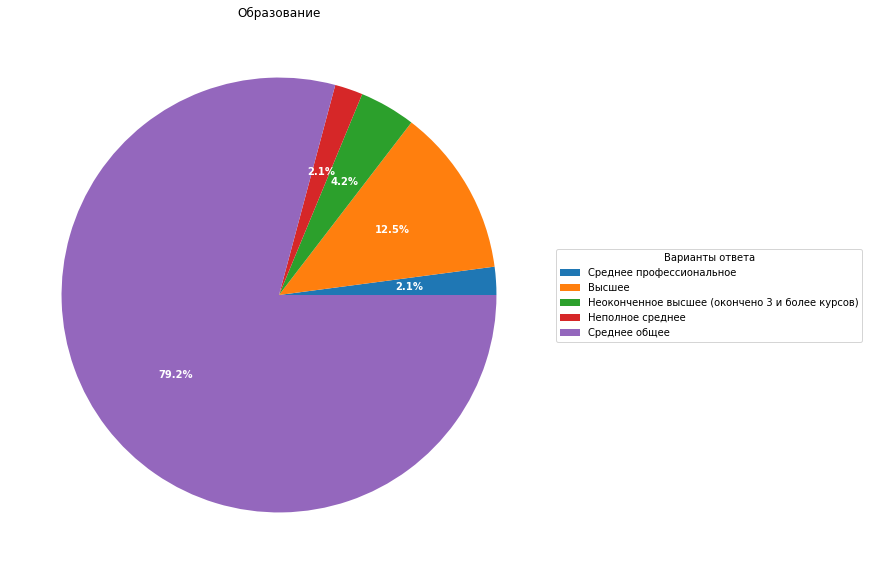

In [94]:
draw_pie_chart(answers[1], titles[1])

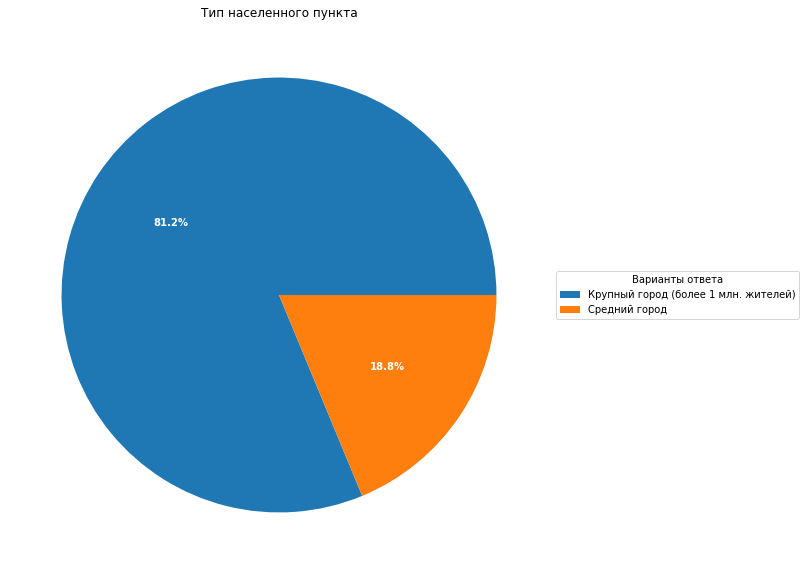

In [95]:
draw_pie_chart(answers[2], titles[2])

Большинство опрошенных проживают в крупном городе.

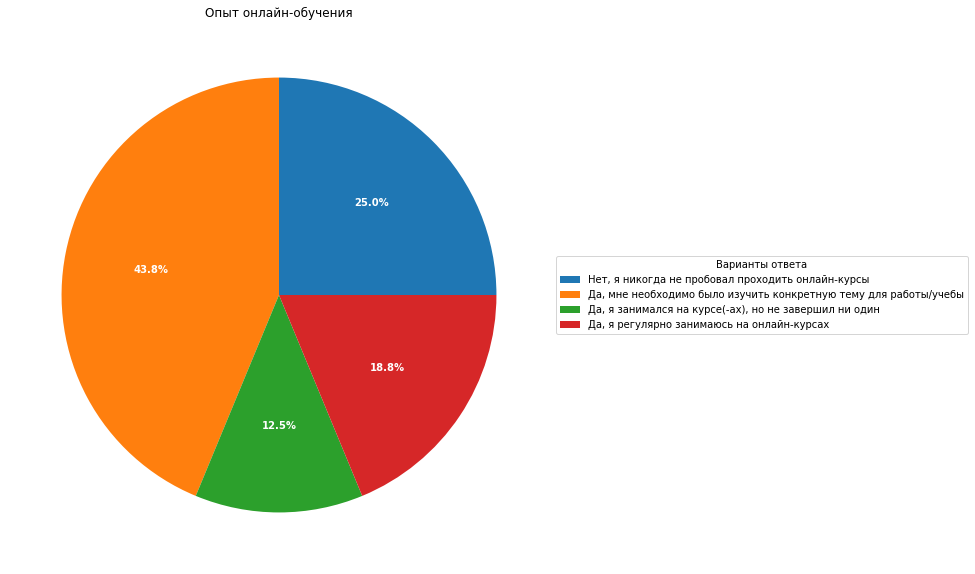

In [96]:
draw_pie_chart(answers[3], titles[3])

Большинство опрошенных (75%) хотя бы раз в жизни пробовали проходить онлайн-курсы. Также диаграмма показывает, что с точки зрения большинства онлайн-курсы - это скорее способ изучить конкретную тему, а не возможность регулярного самообразования.

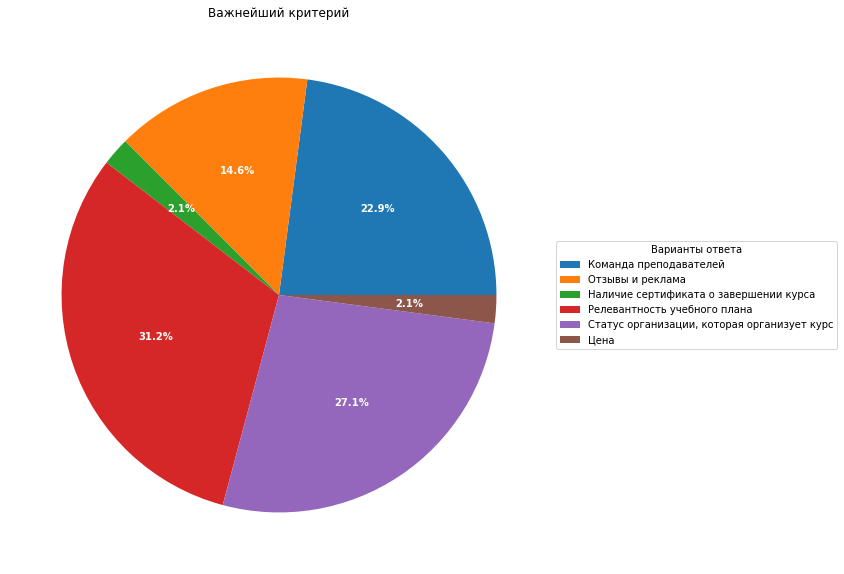

In [97]:
draw_pie_chart(answers[12], titles[12])

31.2% опрошенных отметили, что важнейшим фактором при выборе онлайн-курса является релевантность учебного плана. 
Это соответствует результату предыдущего вопроса, так как, стремясь изучить конкретную тему, учащийся будет искать соответствия в учебной программе курса.
Также популярными вариантами оказались команда преподавателей и статус организации. Это объясняется тем, что в многообразии учебных материалов учащиеся склонны выбирать знакомые им элементы: узнаваемые бренды и крупные лица компании, причастные к создания курса.

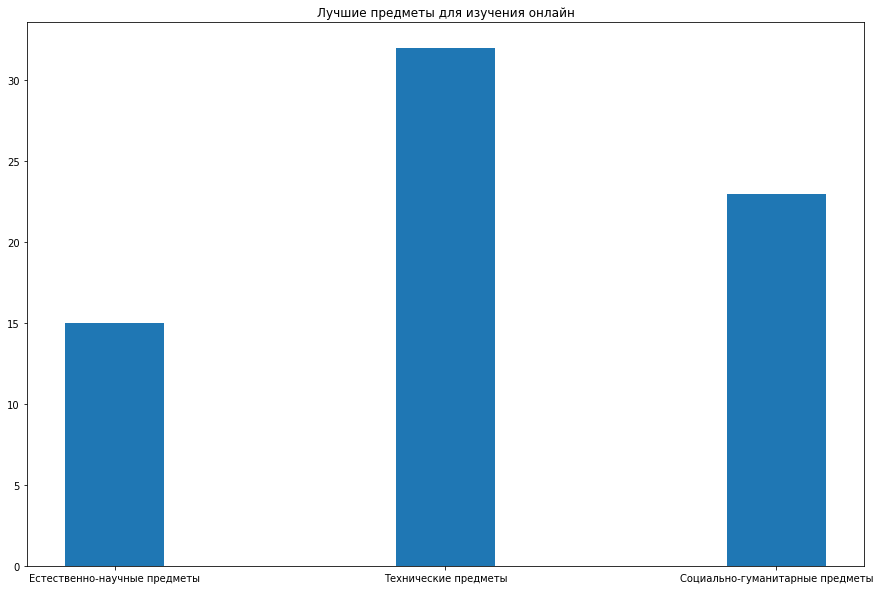

In [98]:
draw_bar_chart(answers[13], titles[13])

По мнению опрошенных, онлайн лучше всего усваиваются технические предметы. Это объясняется в первую очередь популярностью курсов по программированию, количество которых значительно превышает количество курсов по остальным предметам. 

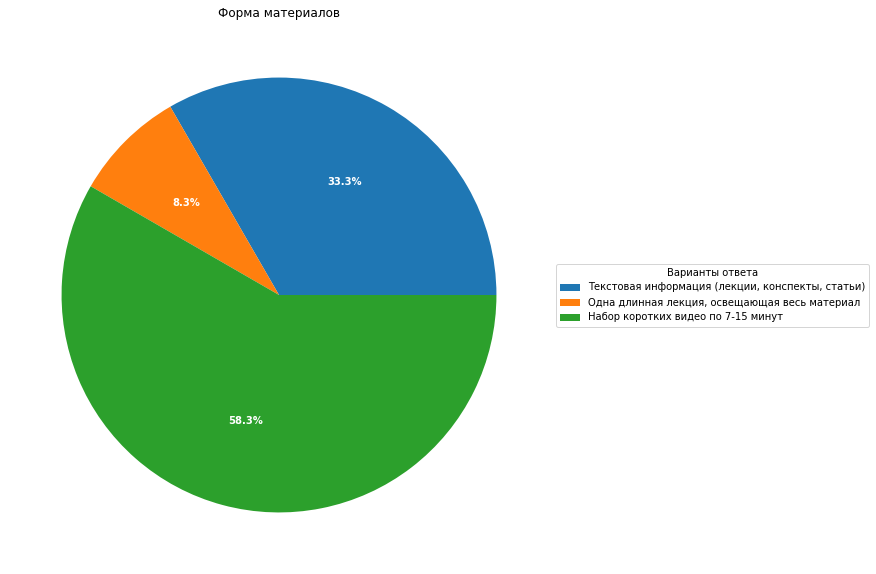

In [99]:
draw_pie_chart(answers[14], titles[14])

58.3% предпочитают получать учебные материалы в виде набора коротких видео по 7-15 минут, а 33.3% хотели бы получать текстовую информацию в виде лекций, конспектов и статей. Примечательно, что классическую "университетскую" форму материалов - цельную лекцию, наиболее полно освещающую весь материал, - выбрали всего 8.3% опрошенных.

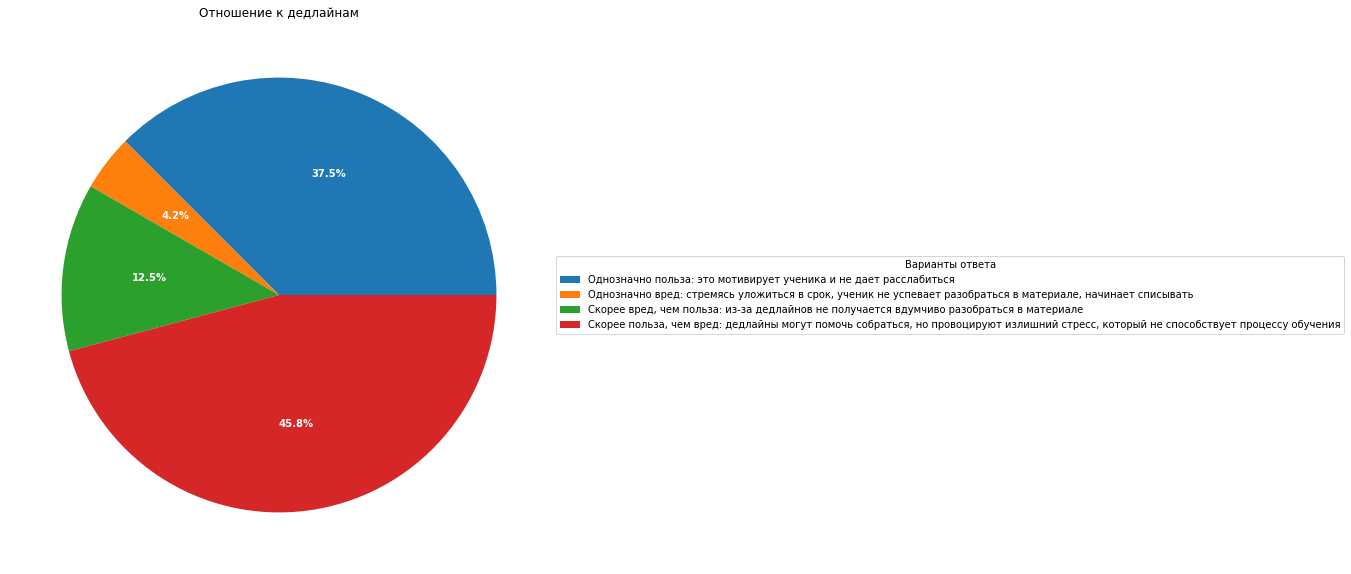

In [100]:
draw_pie_chart(answers[15], titles[15])

За пользу дедлайнов в сумме высказались 83.3% опрошенных, хотя большинство считает, что у наличия дедлайнов есть и отрицательные стороны. 

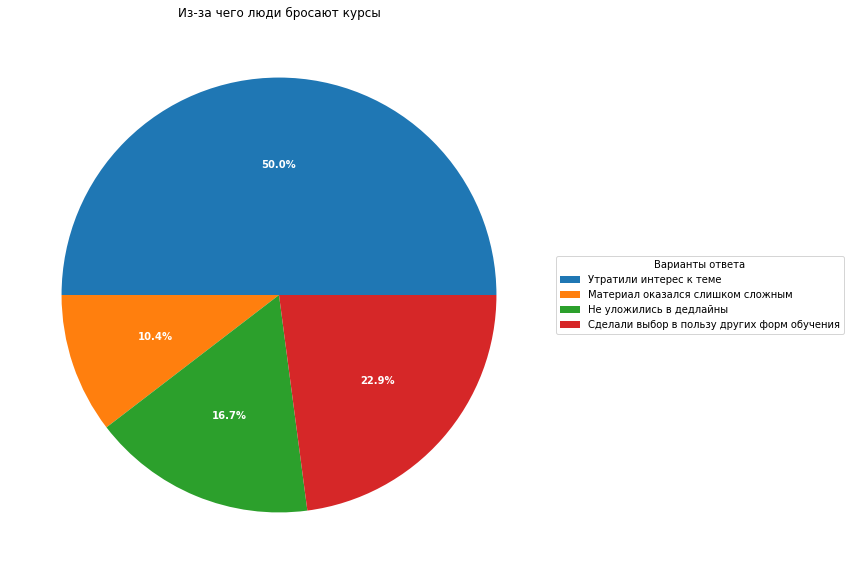

In [101]:
draw_pie_chart(answers[16], titles[16])

Ровно половина считает, что люди бросают онлайн-курсы в основном из-за того, что они утратили интерес к теме. По мнению четверти опрошенных это происходит из-за того, что учащиеся выбирают другие формы обучения.

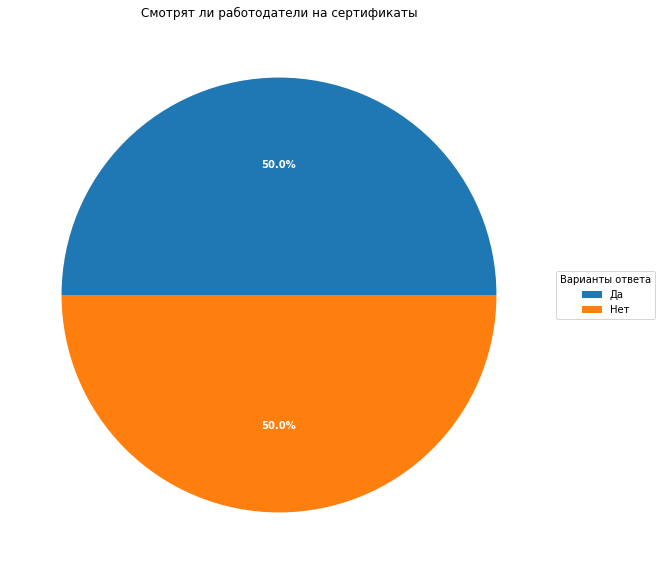

In [102]:
draw_pie_chart(answers[17], titles[17])

Данный вопрос выявлял оценку опрошенных по отношению к практической пользе прохождения курсов и получению сертификатов: мнения разделились поровну. Такая неоднозначность может быть связана с несколькими факторами:
<ol>
    <li>Успешное прохождение фундаменательных курсов высокой сложности от Google, МФТИ, Яндекса, американских и европейских университетов действительно может привлечь внимание, однако таких курсов меньшинство.</li>
    <li>Реклама онлайн-курсов нередко убеждает в успешном трудоустройсте, чтобы привлечь дополнительную аудиторию и формирует ошибочное мнение.</li>
    <li>Множество сертификатов может убедить работодателя не столько в профессионализме кандидата, сколько в его способности и желании к обучению.</li>
</ol>

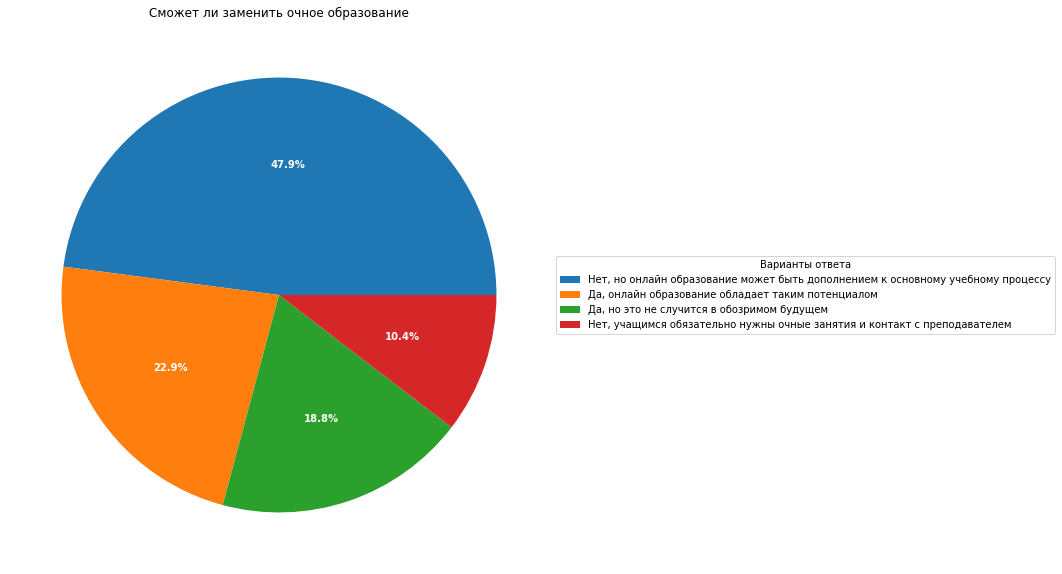

In [103]:
draw_pie_chart(answers[18], titles[18])

На вопрос о перспективах онлайн-образования большинство ответило, что такая форма образования не может заменить очную, но может являться дополнением к основному учебному процессу. Таким образом, онлайн-курсы рассматриваются лишь как дополнительные несамостоятельные источники знания и используются для изучения конкретной узкой темы путем просмотра коротких видео и чтения конпектов - именно это мы узнали из ответов на предыдущие вопросы.

In [104]:
platforms = ["Coursera", "Stepik", "Edx", "GeekBrains", "Udacity", "Udemy", "Открытое образование", "Фоксфорд"]
good_reviews_number = get_good_reviews(answers[4:12])

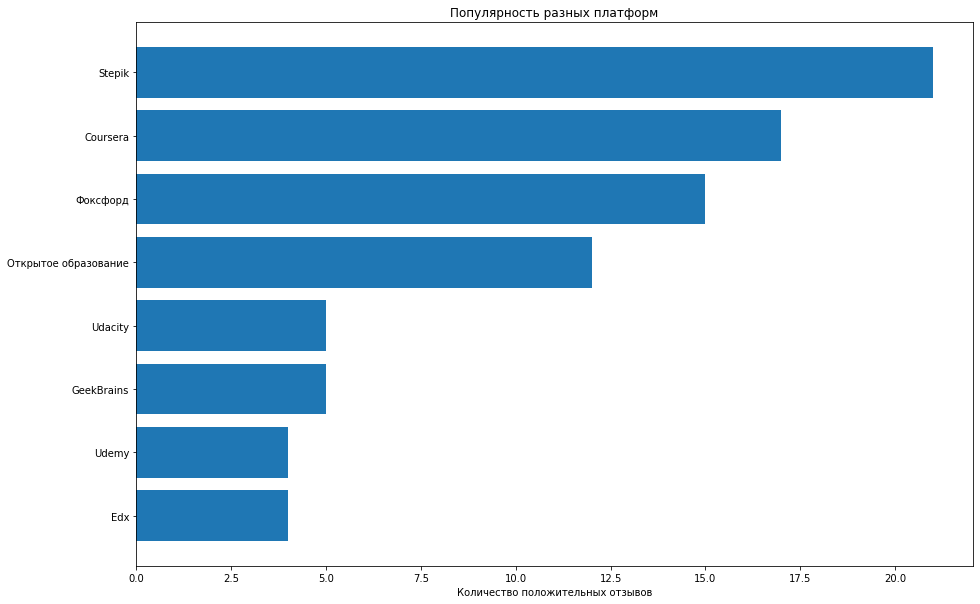

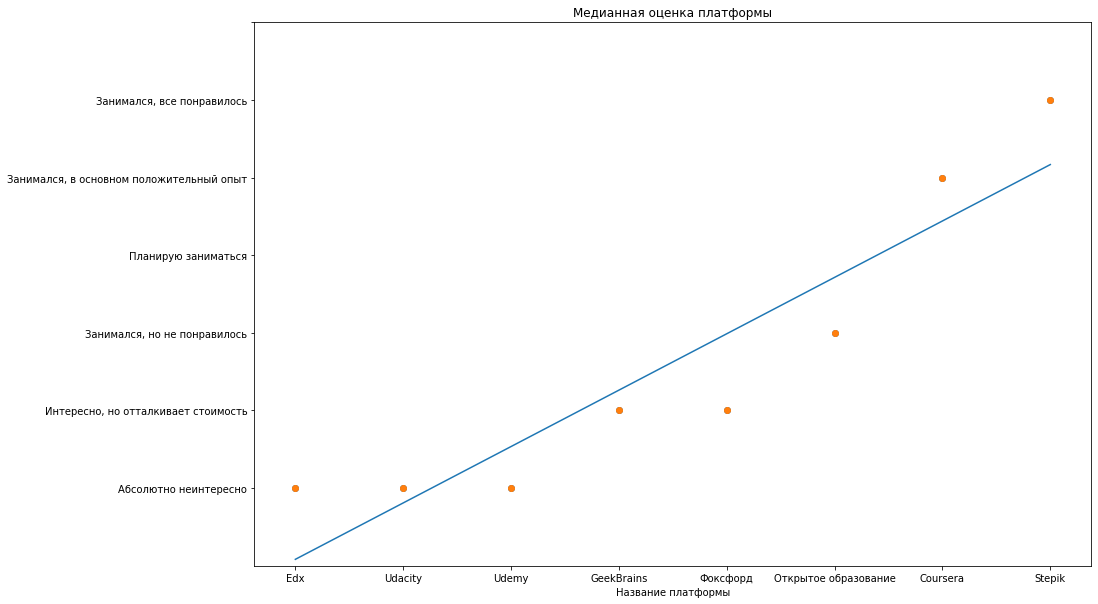

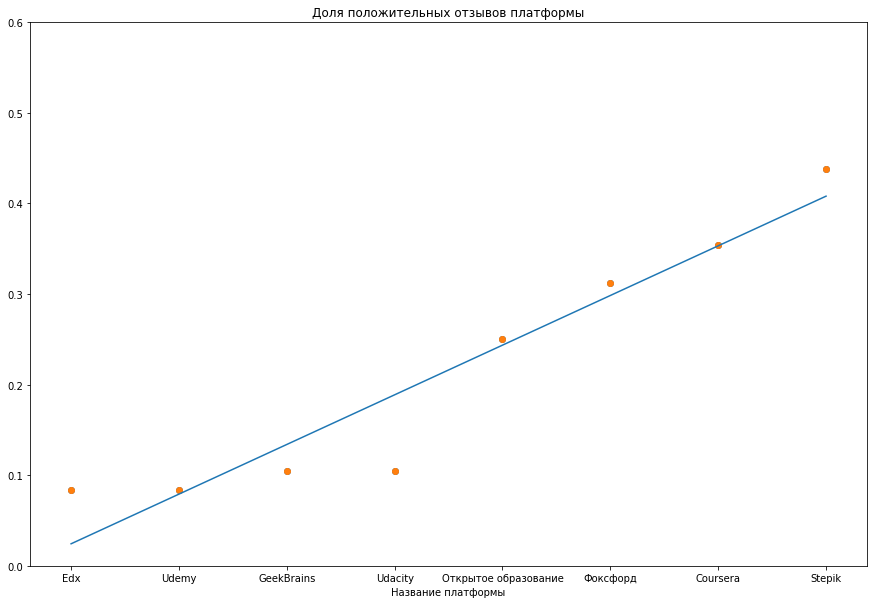

In [105]:
# сортируем платформы по количеству положительных отзывов
sorted_data = sorted(zip(platforms, good_reviews_number), key=lambda x: x[1])
draw_horizontal_bars(sorted_data)

draw_popularity_charts(platforms, answers[4:12])

По медианной оценке платформы онлайн-образования разделились на три четкие группы:
<ol>
    <li>Edx, Udacity, Udemy - неизвестные в России платформы: либо англоязычные (Edx, Udacity), либо платные</li>
    <li>GeekBrains, Фоксфорд - пользуются популярностью в России, но курсы продаются по высокой цене. Заметим также, что форма материалов на их платформе - длинная цельная лекция, наименее популярный вариант у опрошенных</li>
    <li>Открытое образование, Coursera, Stepik - отоносительно популярные в России платформы с бесплатными онлайн-курсами (на Coursera необходимо платить за сертификат). Форма материалов - короткие видео и конспекты, есть дедлайны, множество курсов от ведущих компаний и университетов.</li>
</ol>

Распределение платформ по доле положительных отзывов показывает ту же ситацию с незначительными отклонениями.

Оба графика демонстрируют сильную корреляцию между полученными в ходе опроса ответами и популярностью платформы. Таким образом, линейная регрессия показывает, что чем больше координата по оси X, тем больше соответствующий курс соответствует тем критериям, которые, как показала анкета, определяют популярность у учащихся. Это позволяет нам делать вывод о том, какими параметрами должен обладать "идеальный" онлайн-курс.

GitHub проекта: https://github.com/let-robots-reign/BMSTU_Survey